In [1]:
import sys
sys.path.append("../../")

../../../evolutions/2023-09-11T18-14-48_test_evolve
33


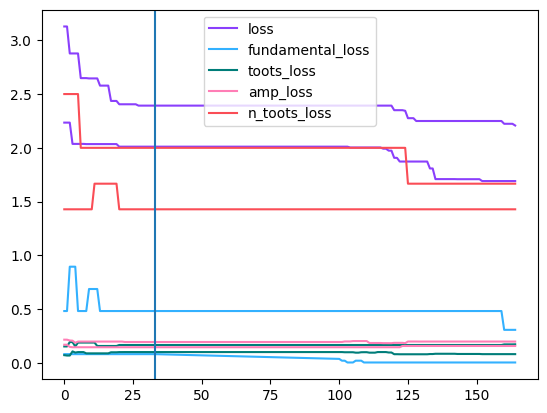

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from didgelab.calc.geo import Geo

evolutions_folder="../../../evolutions/"
subfolders = sorted(os.listdir(evolutions_folder))
latestfolder = os.path.join(evolutions_folder, subfolders[-1])
print(latestfolder)
df = pd.read_csv(os.path.join(latestfolder, "losses.csv"))
steps = []
df = df.query("i_generation<i_generation.max()")
df

x = df.i_generation.unique()

columns=list(df.columns)
columns=columns[columns.index("loss"):]
colors = ['#8a3ffc', '#33b1ff', '#007d79', '#ff7eb6', '#fa4d56', '#fff1f1', '#6fdc8c', '#4589ff', '#d12771', '#d2a106', '#08bdba', '#bae6ff', '#ba4e00', '#d4bbff']
for i in range(len(columns)):
    c = columns[i]
    ymin=df.groupby("i_generation")[c].min()
    plt.plot(x, ymin, label=c, color=colors[i])
    ymin=df.groupby("i_generation")[c].max()
    plt.plot(x, ymin, label="_" + c, color=colors[i])
    
for step in df.step.unique()[0:-1]:
    f=df.query("step==@step").i_generation.max()
    plt.axvline(f)
    print(f)

plt.legend()
#for i_mutant in df.i_mutant.unique():
#    plt.plot(x,df.query("i_mutant==@i_mutant").loss)


In [60]:
df = pd.read_csv(os.path.join(latestfolder, "losses.csv"))
df.i_generation

0        0
1        0
2        0
3        0
4        0
      ... 
928    158
929    158
930    159
931    159
932    159
Name: i_generation, Length: 933, dtype: int64

In [11]:
_df = df.query("i_generation==i_generation.max()")
columns = _df.columns[4:]
dfl = {"loss": columns}
for c in ["min", "max", "mean"]:
    dfl[c] = []
    
for c in columns:
    dfl["min"].append(_df[c].min())
    dfl["max"].append(_df[c].max())
    dfl["mean"].append(_df[c].mean())

dfl = pd.DataFrame(dfl).round(2)
dfl

,loss,min,max,mean
0,loss,1.69,2.21,1.98
1,fundamental_loss,0.00,0.31,0.06
2,toots_loss,0.08,0.17,0.12
3,amp_loss,0.16,0.20,0.18
4,n_toots_loss,1.43,1.67,1.62


In [33]:
def to_latex(df):
    s=df.style.hide(axis="index").to_latex()
    lines = s.split("\n")
    header = lines[1].split("&")
    header[-1] = header[-1].replace("\\\\", "")
    header = ["\\textbf{" + h.strip() + "}" for h in header]
    lines[1] = " & ".join(header) + "\\\\"
    return "\n".join(lines)

for line in to_latex(dfl).split("\\n"):
    print(line)

\begin{tabular}{lrrr}
\textbf{loss} & \textbf{min} & \textbf{max} & \textbf{mean}\\
loss & 1.690000 & 2.210000 & 1.980000 \\
fundamental_loss & 0.000000 & 0.310000 & 0.060000 \\
toots_loss & 0.080000 & 0.170000 & 0.120000 \\
amp_loss & 0.160000 & 0.200000 & 0.180000 \\
n_toots_loss & 1.430000 & 1.670000 & 1.620000 \\
\end{tabular}



In [71]:
losses=[{"loss": 2.3803732805626576, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.10318635951013455, "amp_loss": 0.1951687079394387, "n_toots_loss": 2.0}, {"loss": 2.0246256437095007, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.11485707426297154, "amp_loss": 0.16108368966677833, "n_toots_loss": 1.6666666666666667}, {"loss": 2.3521452135131438, "fundamental_loss": 0.0378921685950484, "toots_loss": 0.12648156410619826, "amp_loss": 0.18777148081189726, "n_toots_loss": 2.0}, {"loss": 2.392462867898666, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.1354221950157859, "amp_loss": 0.17502245976979583, "n_toots_loss": 2.0}, {"loss": 2.365262619607094, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.10439257548253655, "amp_loss": 0.17885183101147326, "n_toots_loss": 2.0}, {"loss": 2.010851845272761, "fundamental_loss": 0.30792310304554427, "toots_loss": 0.10135548906675496, "amp_loss": 0.17300182458903313, "n_toots_loss": 1.4285714285714286}, {"loss": 2.059225502092156, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.1464526824743242, "amp_loss": 0.164087939838081, "n_toots_loss": 1.6666666666666667}, {"loss": 2.0348523350841483, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.12826597711918666, "amp_loss": 0.15790147818521058, "n_toots_loss": 1.6666666666666667}, {"loss": 2.249494188631589, "fundamental_loss": 0.4827926068664379, "toots_loss": 0.16714512607250054, "amp_loss": 0.1709850271212219, "n_toots_loss": 1.4285714285714286}, {"loss": 2.036578439989408, "fundamental_loss": 0.08201821311308422, "toots_loss": 0.14165454413673081, "amp_loss": 0.14623901607292622, "n_toots_loss": 1.6666666666666667}]
l=losses[0]
l = [[k,f"{v:.2f}"] for k,v in l.items()]
l = pd.DataFrame(l, columns=["loss type", "value"])
l

,loss type,value
0,loss,2.38
1,fundamental_loss,0.08
2,toots_loss,0.10
3,amp_loss,0.20
4,n_toots_loss,2.00


['D1 (-12)', 'F2 (-45)', 'C#3 (33)', 'G3 (-11)', 'B4 (-7)', 'F#4 (16)', 'A5 (-14)', 'B5 (16)']
['D1 (31)', 'E2 (15)', 'C3 (-26)', 'G3 (47)', 'B4 (-34)', 'D4 (-23)', 'F4 (-15)', 'G4 (33)', 'A5 (-46)']
['D1 (-6)', 'F2 (-37)', 'C#3 (-18)', 'G3 (1)', 'C4 (31)', 'D#4 (1)', 'F4 (-40)', 'A5 (23)']
['D1 (-8)', 'E2 (9)', 'C3 (-21)', 'F#3 (35)', 'A#4 (-36)', 'D4 (12)', 'F4 (32)', 'G4 (12)']
['D1 (-9)', 'D#2 (-37)', 'C3 (-18)', 'G3 (39)', 'B4 (31)', 'D4 (31)', 'F4 (30)', 'G#4 (41)']
['D#1 (44)', 'F#2 (24)', 'D#3 (43)', 'A4 (-11)', 'C#4 (0)', 'F4 (11)', 'G4 (-8)', 'A#5 (39)']
['D1 (-11)', 'E2 (-48)', 'C#3 (-14)', 'G3 (35)', 'B4 (21)', 'D4 (4)', 'F4 (-22)', 'G#4 (43)', 'A#5 (-37)']
['D1 (29)', 'E2 (12)', 'C3 (-3)', 'F3 (-44)', 'A#4 (32)', 'C#4 (-32)', 'E4 (-13)', 'G4 (24)', 'A5 (-2)']
['D1 (41)', 'D#2 (19)', 'C3 (-29)', 'F3 (-26)', 'A#4 (-30)', 'C#4 (3)', 'E4 (-5)', 'G4 (23)', 'A5 (18)']
['D1 (-11)', 'E2 (-45)', 'C#3 (-15)', 'F#3 (2)', 'B4 (-5)', 'D4 (-41)', 'F4 (-19)', 'G4 (-43)', 'A#5 (28)']


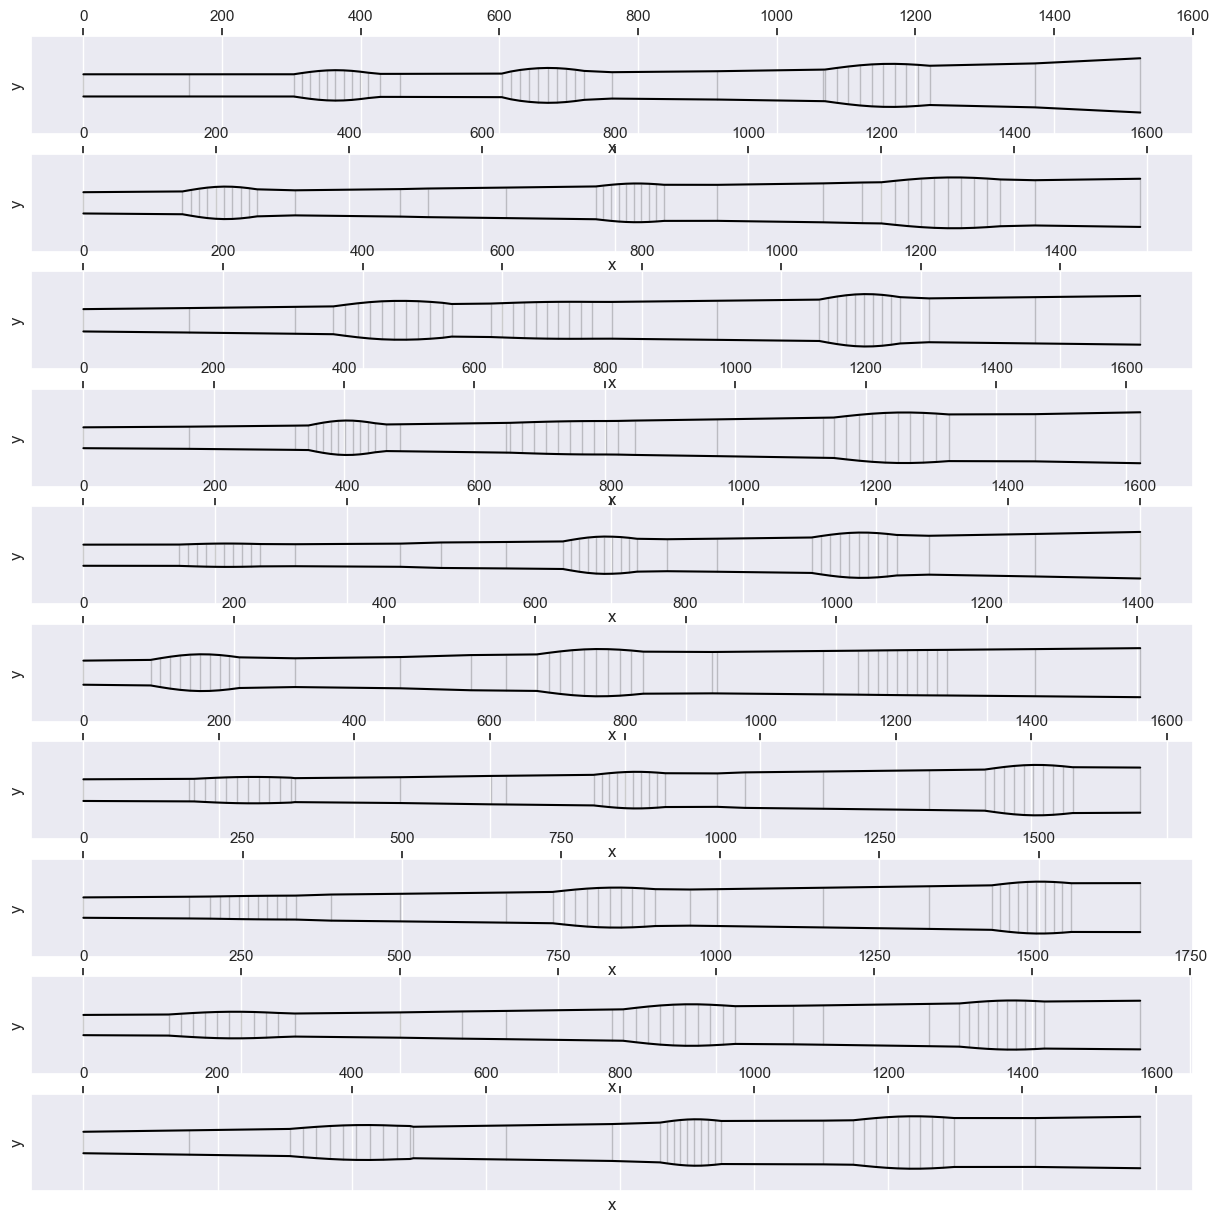

In [43]:
from didgelab.util.didge_visualizer import vis_didge
from didgelab.calc.geo import Geo
from didgelab.calc.sim.sim import quick_analysis
import json

f = os.path.join(latestfolder, "checkpoint_final_1", "geos.json")
geos = json.load(open(f, "r"))
geos = [Geo(geo) for geo in geos]
plt.figure(figsize=(15,15))
for i in range(len(geos)):
    plt.subplot(len(geos), 1, i+1)
    vis_didge(geos[i])

for geo in geos:
    analysis = quick_analysis(geo)
    notes = analysis["notes"]
    r = notes.note_name + " (" + notes.cent_diff.round(0).astype(int).astype(str) + ")"
    print(list(r))

In [48]:
def compute_volume(geo):
    geo=geo.geo
    v = 0
    for i in range(1, len(geo)):
        l = geo[i][0] - geo[i-1][0]
        v+= l*geo[i-1][1]
        v += l*(geo[i][1] - geo[i-1][1])
    return v

geo=[[0,1], [2,0.5]]
geo = Geo(geo)
compute_volume(geo)

1.0

In [10]:
geo=[[0,32], [1500, 72]]
geo=Geo(geo)
geo.compute_volume()/100

1080.0

In [8]:
150*3.2

480.0

In [11]:
notes=analysis["notes"]


0    D1 (-11)
1     F2 (21)
2    C#3 (17)
3     G3 (20)
4      B4 (0)
5    D4 (-39)
6    F4 (-31)
7    G#4 (28)
8    A#5 (17)
dtype: object